# Python Programming

In [2]:
#imports library

import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from scipy.stats import norm
import networkx as nx

# Portfolio 1

In [5]:
#1. Download the Dataset.csv file from Moodle, load its content into pandas data frame and visualise the entire content of the data frame

data = pd.read_csv("Dataset.csv")
print(data.to_string())
print(data.dtypes.value_counts)

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
1     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
2     -122.22     37.86             21.0000         7099        2401         8.3014              358500        NEAR BAY
3     -122.25     37.84             52.0001         3104        1157         3.1200              241400        NEAR BAY
4     -122.26     37.85             52.0000         3503        1504         3.2705              241800        NEAR BAY
5     -121.65     39.32             40.0000          812         374         2.7891               73500          INLAND
6     -121.69     39.36             29.0000         2220        1170         2.3224               56200          INLAND
7     -121.70     39.37             32.0

The above code download the dataset and show all data in dataframe structure 
i.e. comma separated values with all columns class types

In [6]:
#Check the data frame for the following 'data cleaning' issues and resolve them:
#2. Missing values

data.isnull().sum()

#this code check for missing values in dataset. 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
median_income         1
median_house_value    0
ocean_proximity       1
dtype: int64

#From above result it can be notice there are misssing values in column 'median_income' and 'ocean_proximity'

In [7]:
#fill missing values 


data.fillna(data.mode().iloc[0], inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0000,880,322,8.3252,452600,NEAR BAY
1,-122.23,37.88,41.0000,880,322,8.3252,452600,NEAR BAY
2,-122.22,37.86,21.0000,7099,2401,8.3014,358500,NEAR BAY
3,-122.25,37.84,52.0001,3104,1157,3.1200,241400,NEAR BAY
4,-122.26,37.85,52.0000,3503,1504,3.2705,241800,NEAR BAY
5,-121.65,39.32,40.0000,812,374,2.7891,73500,INLAND
6,-121.69,39.36,29.0000,2220,1170,2.3224,56200,INLAND
7,-121.70,39.37,32.0000,1852,911,1.7885,57000,INLAND
8,-121.70,39.36,46.0000,1210,523,1.9100,63900,INLAND
9,-121.70,39.36,37.0000,2330,1505,2.0474,56000,INLAND


It can be notice from the dataset that the median_income and ocean_proximity column has one missing value which has been fill by  most frequent data of that column.

In [8]:
#3. Unnecessary duplicates
print(data.duplicated())

data = data.drop_duplicates().reset_index(drop=True)

print(data.to_string())

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
dtype: bool
    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
1     -122.22     37.86             21.0000         7099        2401         8.3014              358500        NEAR BAY
2     -122.25     37.84             52.0001         3104        1157         3.1200              241400        NEAR BAY
3     -122.26     37.85             52.0000         3503        1504         3.2705              241800        NEAR BAY
4     -121.65     39.32             40.0000         

It can be notice from the dataset that row 1 and 27 has duplicates value which returns TRUE for that row that confirmed this value as duplicates.That 2 row has been dropped by the function duplicates()

In [9]:
#4. Wrong data types

#housing_median_age has wrong data type which should be integer instead of float

data= data.astype({'housing_median_age': np.int64})
print(data.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88                  41          880         322         8.3252              452600        NEAR BAY
1     -122.22     37.86                  21         7099        2401         8.3014              358500        NEAR BAY
2     -122.25     37.84                  52         3104        1157         3.1200              241400        NEAR BAY
3     -122.26     37.85                  52         3503        1504         3.2705              241800        NEAR BAY
4     -121.65     39.32                  40          812         374         2.7891               73500          INLAND
5     -121.69     39.36                  29         2220        1170         2.3224               56200          INLAND
6     -121.70     39.37                  32         1852         911         1.7885               57000          INLAND
7     -121.70     39.36                 

We can notice from the dataset that the housing_median_age column type is Float
which should be an integer value which has been converted by the function np.int64()

In [10]:
#5. Wrong values

From above dataset we can notice that column median_income has wrong values. The income should be in large number. Also the ocean_proximity has wrong values  in row no. 16,17, which should be as 'NEAR OCEAN' instead of 'NEAR O'.

In [11]:
#6. Save the updated data frame into a new CSV file

data.to_csv("New_Dataset.csv")

# The above code is to save the existing data into new csv file.

In [12]:
#The house prices are at the focus of this data frame. By using the updated data frame,provide the following values, which describe the column 'median_house_value':
#7. Mean

print(data['median_house_value'].mean())

174730.76923076922


The above code is to calculate the average price of the house..which is 174730.76923076922 as an average price of the house.

In [13]:
#8. Median

print(data['median_house_value'].median())

90200.0


The baove code show the median of the house value that is 90200.0

In [14]:
#9. Range

print("The range of the median_house_value is:", data['median_house_value'].max() - data['median_house_value'].min())


The range of the median_house_value is: 396600


The above code find the range of that data which can be find by its Max value - Min value of that column.


In [15]:
#10. The column 'median_income' contains currency in tens of thousands USD. 
#Convert it into USD and visualise the entire updated data frame

data['median_income']=data['median_income'] * 10000

data

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,322,83252.0,452600,NEAR BAY
1,-122.22,37.86,21,7099,2401,83014.0,358500,NEAR BAY
2,-122.25,37.84,52,3104,1157,31200.0,241400,NEAR BAY
3,-122.26,37.85,52,3503,1504,32705.0,241800,NEAR BAY
4,-121.65,39.32,40,812,374,27891.0,73500,INLAND
5,-121.69,39.36,29,2220,1170,23224.0,56200,INLAND
6,-121.70,39.37,32,1852,911,17885.0,57000,INLAND
7,-121.70,39.36,46,1210,523,19100.0,63900,INLAND
8,-121.70,39.36,37,2330,1505,20474.0,56000,INLAND
9,-121.69,39.36,34,842,635,18355.0,63000,INLAND


# Portfolio 2

### Part 1 
### Initialise a two-dimensional array consisting of 5 rows and 10 columns of uniformly distributed data points of integer values from the interval [0..9]. Consider each row of the two-dimensional array as an independent dataset. Display the values on the screen as a table. Plot the first two rows on a single diagram with different colours.

[[0 4 8 3 4 8 6 4 1 5]
 [1 6 3 6 4 6 8 3 1 7]
 [3 6 7 0 4 2 4 4 1 3]
 [3 1 1 8 8 4 8 4 3 6]
 [3 6 8 2 7 1 7 3 6 1]]


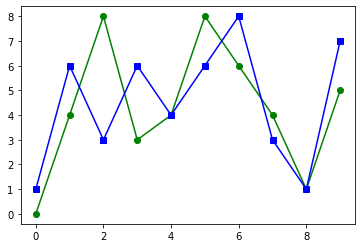

In [16]:
My_arr = np.empty(shape=(5,10), dtype='int')

for i in range(0,5):
    for j in range(0,10):
        My_arr[i,j] = int(np.random.randint(0,9))
        
print(My_arr)

plt.plot(My_arr[0,] , marker = "o", color ="green")
plt.plot(My_arr[1,] , marker = "s", color ="blue")
plt.show()

The above code generate the two-dimensional array consisting of 5 rows and 10 columns 
of uniformly distributed data points of integer values using np.random.randint() function.
where plt.plot() function visualize the data as graph. 

### Part 2 
### Provide the following information about each individual row:
### Mean
### Median
### Standard deviation


In [17]:
row_mean = np.mean(My_arr, axis =1)
print("Mean By its row:", row_mean)

row_median = np.median(My_arr, axis =1)
print("Median By its row:", row_median)

row_std = np.std(My_arr, axis =1)
print("Standard Deviation By its row:", row_std)

# This code find the mean, meadian and Standard Deviation of each individual rows.

Mean By its row: [4.3 4.5 3.4 4.6 4.4]
Median By its row: [4.  5.  3.5 4.  4.5]
Standard Deviation By its row: [2.49198716 2.33452351 2.00997512 2.61533937 2.53771551]


### Part 3 
### Initialise a one-dimensional array representing a normal distribution of 1000 data points with mean value 17 and standard deviation 0.2.

In [18]:
mean = float(17)
std = float(0.2)
size = int(1000)
norm_array = np.random.normal(mean,std, size)
norm_array

# This code represents 1000 normally distributed data with its mean value 17 and 0.2 sd value 
#using np.random.normal() function.

array([17.0871021 , 17.11168963, 16.94467448, 16.4896596 , 16.95476746,
       17.06567924, 17.17335808, 16.7951687 , 16.91907479, 17.1643116 ,
       17.18000543, 17.01106869, 17.0392014 , 16.59103135, 17.13666795,
       16.93715652, 16.87004571, 17.02680475, 17.32366372, 17.10914536,
       16.98544317, 16.69948372, 17.29080071, 17.19402319, 17.24797148,
       17.03986578, 17.29477632, 16.66960589, 16.89329687, 17.10539742,
       17.02425186, 17.23456934, 17.01014785, 17.06396743, 17.00411319,
       16.88756041, 17.44352724, 17.11427959, 16.8673481 , 17.06808373,
       16.8831875 , 17.20674813, 17.10504338, 16.92375556, 16.91714368,
       16.80447175, 16.95268854, 17.15319853, 17.02395346, 16.8188284 ,
       16.92513867, 17.18699766, 17.02696755, 16.77651585, 16.70020168,
       17.38794735, 17.09354312, 17.09739948, 16.97573832, 17.22058579,
       16.74905093, 16.56631596, 16.83290987, 17.26633769, 16.98950945,
       17.05860926, 16.8204387 , 17.14699334, 16.85682185, 17.09

### Part 4 
### Find the maximum and the minimum values of the dataset and calculate the range.

In [19]:
print("Max:", np.max(norm_array))

print("Min:", np.min(norm_array))

print("Range:", round(np.max(norm_array) - np.min(norm_array),2))

# The above code finds the Max, min and range of the data.

Max: 17.74613317359515
Min: 16.30475350250239
Range: 1.44


### Part 5 (2 points):
### Visualise the dataset by using a histogram with 10 bins. Visualise the probability density function.
### Probability density function f:
### f=1/(σ√2π) e^(((〖x-μ)〗^2)/〖2σ〗^2 )
### Where X represents the data points, μ is the mean value and σ is the standard deviation.


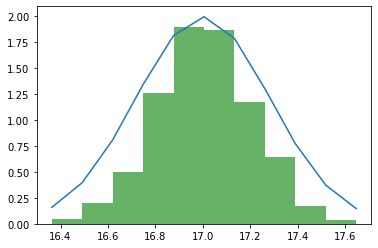

In [18]:
A,X,C = plt.hist(norm_array, bins=10, density=True, alpha=0.6, color='g')
# plt.show()

f = (1/(std*np.sqrt(2*np.pi)))*np.exp(-((X-mean)/(2*std))**2)
#f = (1/(std*np.sqrt(2*np.pi)))*np.exp(-(X-mean)**2/(2*std)**2)

plt.plot(X,f)
plt.show()

The above code plots the data on histogram and shows the normally distibuted data with its density.
The density of that data has been found using Probability density function of math function.

# Portfolio 3

### Task 1:
### Initialize the following matrix 

### A: {[2,5,1],[4,3,7],[1,3,2]}

### Find the determinant, the trace and the inverse of matrix A

In [21]:
# Initialise a matrix M with 3 by 3 elements
M = np.array([[2,5,1],[4,3,7],[1,3,2]])

# Display the matrix
print(M)

# Calculate the determinant of M
D = np.linalg.det(M)

# Display the determinant
print('Determinant:', D)

# Calculate the trace of M
T = np.trace(M)

#Display the trace
print('Trace:', T)

# Calculate the inverse of M
I = np.linalg.inv(M)

print('Matrix:',M)
print('Inverse of Matrix:', I)

[[2 5 1]
 [4 3 7]
 [1 3 2]]
Determinant: -26.000000000000014
Trace: 7
Matrix: [[2 5 1]
 [4 3 7]
 [1 3 2]]
Inverse of Matrix: [[ 0.57692308  0.26923077 -1.23076923]
 [ 0.03846154 -0.11538462  0.38461538]
 [-0.34615385  0.03846154  0.53846154]]


The above code find the determinant of the matrix using algebric function of python det().
Display the Trace of the matrix and the inverse of the matrix using fuction trace() and inv() respectively.

### Task 2:
### Initialise the following square matrices B and C:

### B ={[4,7,2],[3,2,5],[6,4,3]}

### C = {[3,1,9],[7,5,8],[2,1,1]}

### Find the product P of the matrices B and C by using the Python function for matrix
### multiplication. Display the result on the screen.

In [23]:
# Initialise a matrix B with 3x3 elements
B = np.array([[4,7,2],[3,2,5],[6,4,3]], dtype='int')

# Initialise a matrix C with 3x3 elements
C = np.array([[3,1,9],[7,5,8],[2,1,1]], dtype='int')

# Calculate p = B*C
p = np.matmul(B,C)

#print Product p
print('p:', p)

# The above code multiply the two matrix and generate the new matrix using function np.matmul().

p: [[65 41 94]
 [33 18 48]
 [52 29 89]]


### Task 3:
### Consider the following system of linear equations:
###            3x + 2y -z =25
###            2x -y + 4z =19
###            4x - 2y + 3z = 18

### Represent the system of linear equations by using matrices.

### Solution:

Representation the system of linear equations by matrices:

    ( 3,2,-1 ) (x)    (25)
    ( 2,-1,4 ) (y)  = (19)
    ( 4,-2,3 ) (z)    (18)
    
And by following notation:

MX = C, where      ( 3,2,-1 )       (x)       (25)
               M = ( 2,-1,4 ) , X = (y) , C = (19)
                   ( 4,-2,3 )       (z)       (18)


### Task 4:
### Provide the algebraic steps for solving the system of linear equations from Task 3 by 
### using matrix notation.

### Solution:

Step 1: MX = c
        find the Matrix M , X and C as below for Task 3
        
        The matrix has 3 rows and 1 column
        
           ( 3,2,-1 )       (x)       (25)
       M = ( 2,-1,4 ) , X = (y) , C = (19)
           ( 4,-2,3 )       (z)       (18)
           
Step 2: M^-1 MX = M^-1 C

Step 3: Find the Inverse of matrix M

        IX = M^-1 C

Step 4: Calculate X = M^-1 * C
        which solve the linear equation system and gives values for X,Y,Z.

### Task 5:
### Solve the system of linear equations from Task 3 by using Python script utilising matrix 
### multiplication and inverse matrix

In [21]:
# Initialise a matrix M with 3x3 elements
M = np.array([[3,2,-1],[2,-1,4],[4,-2,3]])

#Initialise a matrix c
C = np.array([25,19,18])

# Calculate the inverse of Matrix M
I  = np.linalg.inv(M)

#Calculate X = I*C
X = np.matmul(I,C)

#Display Matrix X
print('X:', X)

X: [5. 7. 4.]


The above code solved the linear equation from the task 3 and give the values of X,Y,Z which we put in the eqution to solved the linear equation.

#  Portfolio 4

### Task 1 (5 points)

####  Develop a graph which represents the public transport network of a city of your choice. Some cities have extensive public transport networks. In such case, represent minimum 3 lines with minimum 4 stations on each line. When visualising the network, use different colours for the different lines and their corresponding stations. Provide attributes to the edges which correspond to the distances between stations and visualise them. If the actual distances between the stations are not available, approximate them by using online map services. Visualise the names of the stations.

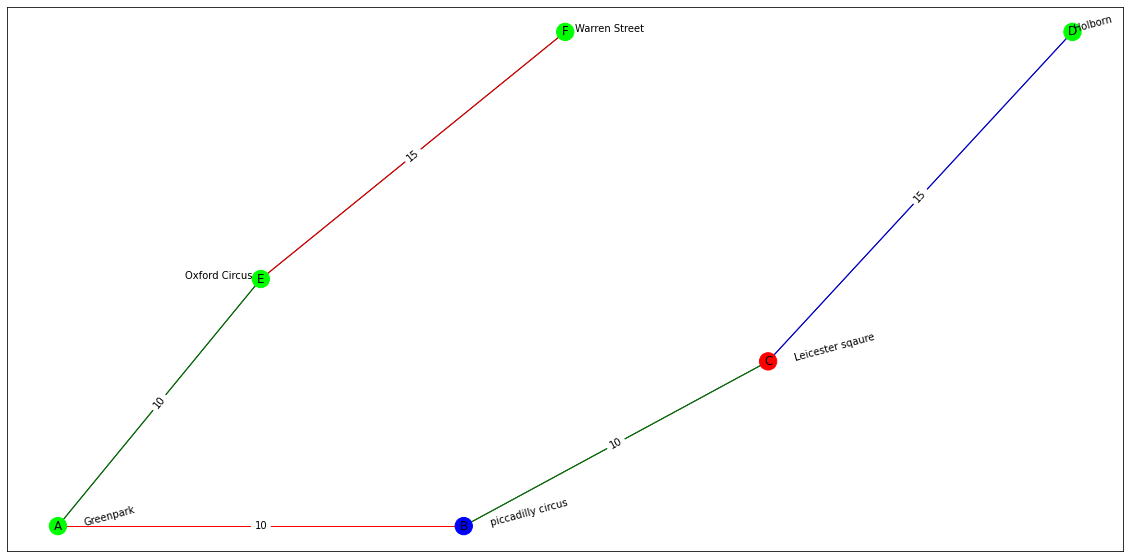

In [66]:

# Create a graph object

G= nx.Graph()

# Add $ station to the graph

G.add_node('A',npos=(10,20),color_node='#00FF00')
G.add_node('B',npos=(18,20),color_node='#0000FF')
G.add_node('C',npos=(24,21),color_node='#FF0000')
G.add_node('D',npos=(30,23),color_node='#00FF00')
G.add_node('E',npos=(14,21.5),color_node='#00FF00')
G.add_node('F',npos=(20,23),color_node='#00FF00')

# Connect nodes

G.add_edge('A', 'B', color='r',distance=10)
G.add_edge('B', 'C', color='g',distance=10)
G.add_edge('C', 'D', color='b',distance=15)
G.add_edge('A', 'E', color='g',distance=10)
G.add_edge('E', 'F', color='r',distance=15)

# Extract attributes from the graph to dictionaries
pos = nx.get_node_attributes(G, 'npos')
node_colour = nx.get_node_attributes(G, 'color_node')
edge_colour = nx.get_edge_attributes(G, 'color')
distance = nx.get_edge_attributes(G, 'distance')

# Place the dictionary values in lists
NodeList = list(node_colour.values())
EdgeList = list(edge_colour.values())


# Set the size of the figure
plt.figure(figsize=(20, 10))

# Display the names of the stations
plt.text(10.5,20,s='Greenpark', rotation=15)
plt.text(18.5,20, s='piccadilly circus', rotation=15)
plt.text(24.5,21, s='Leicester sqaure', rotation=15)
plt.text(30,23, s='Holborn', rotation=15)
plt.text(12.5,21.5, s='Oxford Circus', rotation=0)
plt.text(20.2,23, s='Warren Street', rotation=0)

# Draw the nodes and the edges
nx.draw_networkx(G, pos, node_color=NodeList)
nx.draw_networkx_edges(G, pos, edge_color=EdgeList)
nx.draw_networkx_edge_labels(G, pos, edge_labels=distance)

# Visualise the graph
plt.show()


The below graph shows the public transport network of london city 
which describes some DLR station of the city using NetworkX library
The round shapes describes the node as station and the lines as edges which connects the 
stations and each edges has its attributes and the number between the edges describes the distance between two  stations.

### Task 2 (5 points)
#### Find the average monthly temperatures of three cities of your choice. Represent the data by using a heat map. Provide a colour scale for guidance. Allow the user to specify a threshold for the heat map. Based on this threshold value, use different base colours when representing the data points.

        City    1    2    3     4     5     6     7     8     9    10   11  \
0      Paris  4.9  5.6  8.8  11.4  15.1  18.2  20.4  20.2  16.9  12.9  8.1   
1     Berlin  0.6  2.3  5.1  10.2  14.8  17.9  20.3  19.7  15.3  10.5  6.0   
2  Frankfurt  1.6  2.4  6.4  10.3  14.7  17.8  20.0  19.5  15.2  10.4  5.6   

    12  
0  5.4  
1  1.3  
2  2.5  
Specify Thresold Value:3


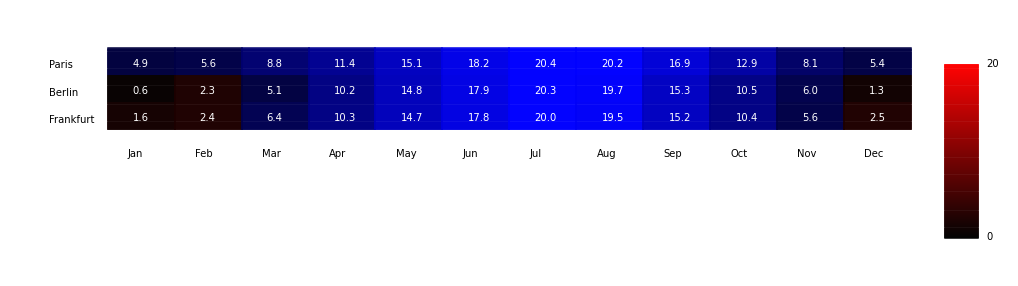

In [24]:
def DrawBox(x, y, size, r, g, b):
    if r < 0:
        r = int(0)
    if g < 0:
        g = int(0)
    if b < 0:
        b = int(0)
    if r > 255:
        r = int(255)
    if g > 255:
        g = int(255)
    if b > 255:
        b = int(255)
    for i in range(0, int(size)):
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))


# Store the dataset into a data frame
df = pd.read_csv('HeatMap.csv')
# Print the content on the screen
print(df.head(7))

# Set the plot
plt.figure(figsize=(18, 5))
plt.axis([0, 600, 0, 400])
plt.xticks([])
plt.yticks([])
plt.axis('off')

Min = int(min(df.min(numeric_only=True)))
Max = int(max(df.max(numeric_only=True)))

BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)

thresold = int(input("Specify Thresold Value:"))
                     

# Generate the heat map
for i in range(0, df.shape[0]):
    for j in range(1, df.shape[1]):
        ColourCode = int(((df.values[i, j]-Min)/(Max-Min))*255)
        if df.values[i, j] > thresold:
            DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, 0, 0, ColourCode)
        if df.values[i, j] <= thresold:
            DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 0, 0)
        plt.text(OffsetX+20+BoxSize*j, OffsetY+300-BoxSize*i, str(df.values[i, j]), color='white')

# Generate the scale
for i in range(0, 256):
    plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(int(i), 0, 0))
plt.text(585, 58, Min)
plt.text(585, 312, Max)

plt.text(72, 180, 'Jan')
plt.text(112, 180, 'Feb')
plt.text(152, 180, 'Mar')
plt.text(192, 180, 'Apr')
plt.text(232, 180, 'May')
plt.text(272, 180, 'Jun')
plt.text(312, 180, 'Jul')
plt.text(352, 180, 'Aug')
plt.text(392, 180, 'Sep')
plt.text(432, 180, 'Oct')
plt.text(472, 180, 'Nov')
plt.text(512, 180, 'Dec')

plt.text(25, 310, str(df.values[0, 0]))
plt.text(25, 270, str(df.values[1, 0]))
plt.text(25, 230, str(df.values[2, 0]))

plt.show()



 The above code creat the heat map for the data from csv file HatMap.csv.
 Also user can specify the thresold value. if thresold value is greater than data points then
 it shows the balck and orange color either blue and black.
 The below graph shows the heat map for the 3 city's monthly average temperature for the year.
 The Dark black color shows the lower temperature of the month and the dark orange color
 shows the highest temperature of the month July and August and it also represents the strong correlation
 between the 3 city's temperature for the same months.


### Task 3 (5 points)
#### Represent the data from Task 2 by using parallel coordinates. Use different colours for each city's average monthly temperatures.

In [25]:
# Read dataset from CSV file
Data = pd.read_csv('HeatMap.csv',index_col=False)

Tempdata = np.array(Data.drop(['City'], axis = 1))
Tempdata




array([[ 4.9,  5.6,  8.8, 11.4, 15.1, 18.2, 20.4, 20.2, 16.9, 12.9,  8.1,
         5.4],
       [ 0.6,  2.3,  5.1, 10.2, 14.8, 17.9, 20.3, 19.7, 15.3, 10.5,  6. ,
         1.3],
       [ 1.6,  2.4,  6.4, 10.3, 14.7, 17.8, 20. , 19.5, 15.2, 10.4,  5.6,
         2.5]])

Number of Rows:  3
Number of Columns:  12


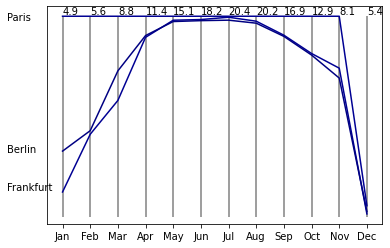

In [26]:
# Print dimension of dataset
print('Number of Rows: ', Tempdata.shape[0])
print('Number of Columns: ', Tempdata.shape[1])

# Find the maximum values per column
Maximum = np.amax(Tempdata, axis=0)

# Normalise to interval 0 .. 100
for i in range(0, Tempdata.shape[0]):
    for j in range(0, Tempdata.shape[1]-1):
        Tempdata[i, j] = float(Tempdata[i, j]*(100.0/Maximum[j]))

# Spine names
Name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Test for random RGB in hex
k = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
MyC = '#'
for i in range(0, 6):
    s = np.random.choice(k)
    MyC = MyC + s

plt.yticks([])

# Spines
for i in range(0, Tempdata.shape[1]):
    plt.vlines(i, 0, 100, '#808080')

# Generate the parallel coordinates
for i in range(0, Tempdata.shape[0]):
    if Tempdata[i, 4] < float(40.0):
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + s1 + s2 + '0000'
        plt.plot(Name, Tempdata[i], MyC)

for i in range(0, Tempdata.shape[0]):
    if float(40.0) < Tempdata[i, 4] < float(60.0):
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + '00' + s1 + s2 + '00'
        plt.plot(Name, Tempdata[i], MyC)

for i in range(0, Tempdata.shape[0]):
    if float(60.0) < Tempdata[i, 4]:
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + '0000' + s1 + s2
        plt.plot(Name, Tempdata[i], MyC)

plt.text(0, 101, round(Maximum[0], 2))
plt.text(1, 101, round(Maximum[1], 2))
plt.text(2, 101, round(Maximum[2], 2))
plt.text(3, 101, round(Maximum[3], 2))
plt.text(4, 101, round(Maximum[4], 2))
plt.text(5, 101, round(Maximum[5], 2))
plt.text(6, 101, round(Maximum[6], 2))
plt.text(7, 101, round(Maximum[7], 2))
plt.text(8, 101, round(Maximum[8], 2))
plt.text(9, 101, round(Maximum[9], 2))
plt.text(10, 101, round(Maximum[10], 2))
plt.text(11, 101, round(Maximum[11], 2))


plt.text(-2, 13, 'Frankfurt')
plt.text(-2, 32, 'Berlin')
plt.text(-2, 98, 'Paris')

plt.show()



Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them.
The above parallel coordinates graph shows the data of the three different cities temperature data, Paris, Berlin, Frankfurt.
We can notice fro the above graph that the Paris city has highest temperature compare to two other cities.We can also notice from the graph that berlin and frankfurt has almost the same temperature over the year.for the month April-october both berlin and franfurt have almost the same temperature.